## Практична робота №7. Вирішення задачі класифікації вин за допомогою Support Vector Machine
### Виконав студент групи ШІДМ-51 Тертишний Владислав
В цій роботі ми будемо використовувати набір даних wine з scikit-learn для класифікації вин на основі їх хімічних властивостей.

In [17]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## Завантаження та підготовка даних

In [18]:
# Завантажуємо набір даних wine
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Виводимо інформацію про набір даних
print("Розмірність набору даних:", X.shape)
print("\nНазви ознак:\n", wine.feature_names)
print("\nКласи вин:\n", wine.target_names)

Розмірність набору даних: (178, 13)

Назви ознак:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Класи вин:
 ['class_0' 'class_1' 'class_2']


In [19]:
# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділяємо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Навчання моделей SVM з різними ядрами

In [20]:
# Створюємо словник з різними моделями SVM
models = {
    'Linear': svm.SVC(kernel='linear', C=1.0),
    'RBF': svm.SVC(kernel='rbf', gamma='scale', C=1.0),
    'Polynomial': svm.SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
}

# Навчаємо моделі та оцінюємо їх ефективність
results = {}

for name, model in models.items():
    # Навчання моделі
    model.fit(X_train, y_train)
    
    # Прогнозування
    y_pred = model.predict(X_test)
    
    # Зберігаємо точність
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\nРезультати для {name} SVM:")
    print(f"Точність: {accuracy:.4f}")
    print("\nЗвіт про класифікацію:")
    print(classification_report(y_test, y_pred, target_names=wine.target_names))
    
    


Результати для Linear SVM:
Точність: 0.9815

Звіт про класифікацію:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Результати для RBF SVM:
Точність: 0.9815

Звіт про класифікацію:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Результати для Polynomial SVM:
Точність: 0.9630

Звіт про класифікацію:
              precision    rec

## Візуалізація результатів

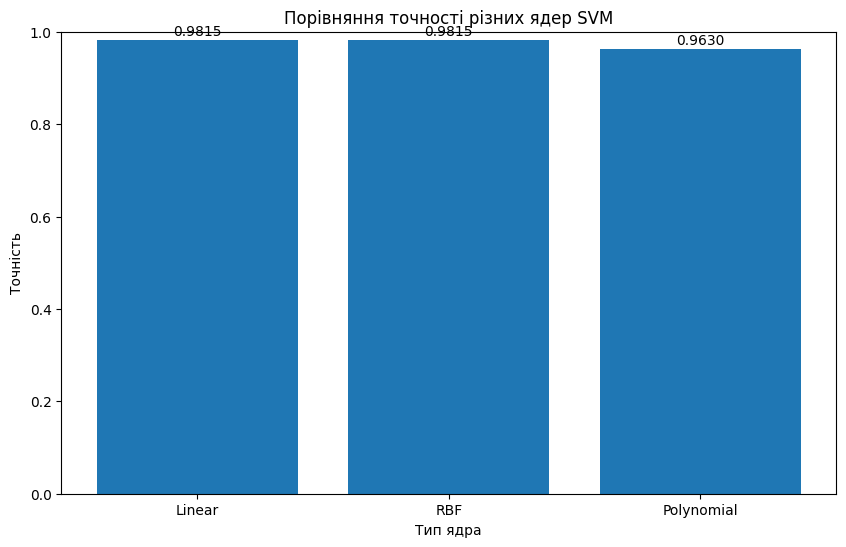

In [21]:
# Створюємо графік порівняння точності різних ядер
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Порівняння точності різних ядер SVM')
plt.xlabel('Тип ядра')
plt.ylabel('Точність')
plt.ylim(0, 1)

# Додаємо значення точності над стовпчиками
for i, (name, accuracy) in enumerate(results.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')

plt.show()

## Візуалізація даних у двовимірному просторі

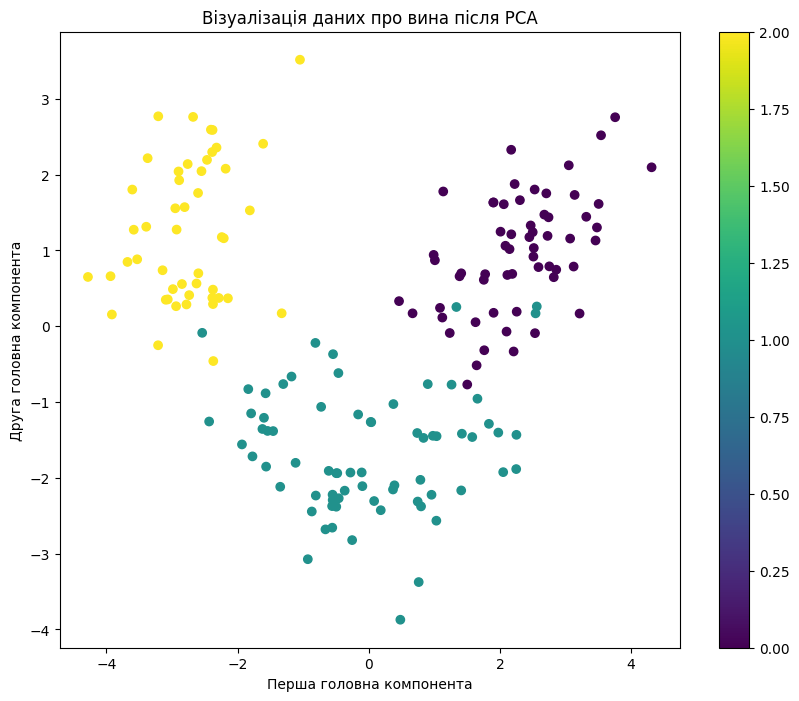

In [22]:
from sklearn.decomposition import PCA

# Зменшуємо розмірність до 2D для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Створюємо графік
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Візуалізація даних про вина після PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(scatter)
plt.show()